In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
features = 3
samples = 100
X, y = make_classification(n_samples=samples, n_features=features, n_classes=2, n_informative=features,
                    n_redundant=0, n_repeated=0, class_sep=2.50, n_clusters_per_class=1)

In [3]:
lr = LogisticRegression().fit(X, y); lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [4]:
b1, b2, b3 = lr.coef_[0]
b0 = lr.intercept_[0]
X = np.hstack((np.ones(samples).reshape(-1, 1), X))
y = y.reshape(-1, 1)
b = np.array([[b0, b1, b2, b3]])

In [5]:
# integrating y-intercept into the data matrix, X
X[:3]

array([[ 1.        ,  0.86443514,  2.48191296,  2.97997709],
       [ 1.        , -3.18126096,  0.87831423,  2.3864222 ],
       [ 1.        , -4.31706456,  0.12854129,  0.62226708]])

In [6]:
y[:3]

array([[1],
       [0],
       [0]])

In [7]:
# baseline beta parameter values
b

array([[ 5.10067685,  1.93917732, -0.62553907, -0.77889652]])

In [8]:
# n: number of samples
# d: number of dimensions or predictors
# o: output of function
def fn(b, X):
    # X: n x d
    # b: 1 x d
    # o: n x 1
    return X @ b.T

In [9]:
def sigmoid(z):
    # z: n x 1
    # o: n x 1
    return 1 / (1 + np.exp(-z))

In [10]:
def neg_log_loss(X, y, b):
    # X: n x d
    # y: n x 1
    # b: 1 x d
    # o: n x 1
    p = sigmoid(fn(b, X))
    a1 = y * np.log(p)
    a2 = (1 - y) * np.log(1 - p)
    return - (a1 + a2)

In [11]:
def gradient(X, y, b):
    # X: n x d
    # y: n x 1
    # b: 1 x d
    # o: n x d
    p = sigmoid(fn(b, X))
    return (p - y) * X

In [12]:
b_hat = np.random.random((1, features + 1))
α = 0.00001
I = int(1e4)
nll = np.zeros(I)
gradients = np.zeros((I, features + 1))
for i in range(I):
    l = neg_log_loss(X, y, b_hat).sum()
    g = gradient(X, y, b_hat).sum(axis=0)
    b_hat -= α * g
    nll[i] = l
    gradients[i] = g

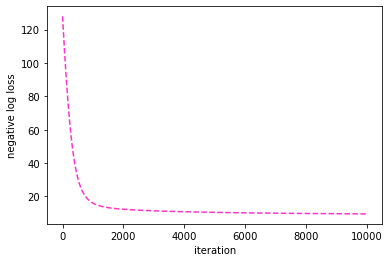

In [13]:
plt.plot(nll, linestyle='--', color='#ff33cc')
plt.xlabel('iteration')
plt.ylabel('negative log loss');

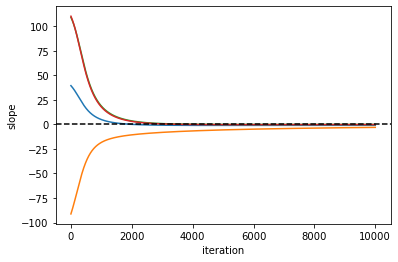

In [14]:
plt.plot(range(I), gradients[:,0])
plt.plot(range(I), gradients[:,1])
plt.plot(range(I), gradients[:,2])
plt.plot(range(I), gradients[:,3])
plt.axhline(0, linestyle='--', color='black')
plt.xlabel('iteration')
plt.ylabel('slope');

In [15]:
# baseline accuracy
accuracy_score(y, lr.predict(X[:, 1:]))

0.99

In [16]:
# custom model accuracy
accuracy_score(y, sigmoid(fn(b_hat, X)) > 0.50 )

0.99

In [17]:
# baseline parameters
b

array([[ 5.10067685,  1.93917732, -0.62553907, -0.77889652]])

In [18]:
# custom model parameters
b_hat

array([[ 0.4436072 ,  1.59506704,  0.23661936, -0.27725598]])

In [19]:
# x0 -- all 1s
# x2 -- what we are predicting
x1 = np.linspace(X[:,1].min(), X[:,1].max(), samples).reshape(-1, 1)
x3 = np.linspace(X[:,3].min(), X[:,3].max(), samples).reshape(-1, 1)

In [20]:
# creating a new dataset for plotting the decision boundry
X_range = np.hstack((np.ones((samples, 1)), x1, x3)); X_range[:3]

array([[ 1.        , -5.51147676, -0.98052838],
       [ 1.        , -5.4079817 , -0.92456724],
       [ 1.        , -5.30448664, -0.86860611]])

In [21]:
def decision_boundry(p, b, X, b_i):
    q = 1 - p
    log_odds = np.log(p/q)
    x_i = (log_odds - (X @ b.T)) / b_i
    return x_i

In [22]:
boundry1 = decision_boundry(0.50, b[:,[0,1,3]], X_range, b[:,2]).flatten(); boundry1[:10].round(2)

array([-7.71, -7.46, -7.21, -6.96, -6.71, -6.45, -6.2 , -5.95, -5.7 ,
       -5.45])

In [23]:
boundry2 = decision_boundry(0.50, b_hat[:,[0,1,3]], X_range, b_hat[:,2]).flatten(); boundry2[:10].round(2)
boundry2_05 = decision_boundry(0.05, b_hat[:,[0,1,3]], X_range, b_hat[:,2]).flatten(); boundry2[:10].round(2)
boundry2_95 = decision_boundry(0.95, b_hat[:,[0,1,3]], X_range, b_hat[:,2]).flatten(); boundry2[:10].round(2)

array([34.13, 33.5 , 32.87, 32.23, 31.6 , 30.97, 30.34, 29.7 , 29.07,
       28.44])

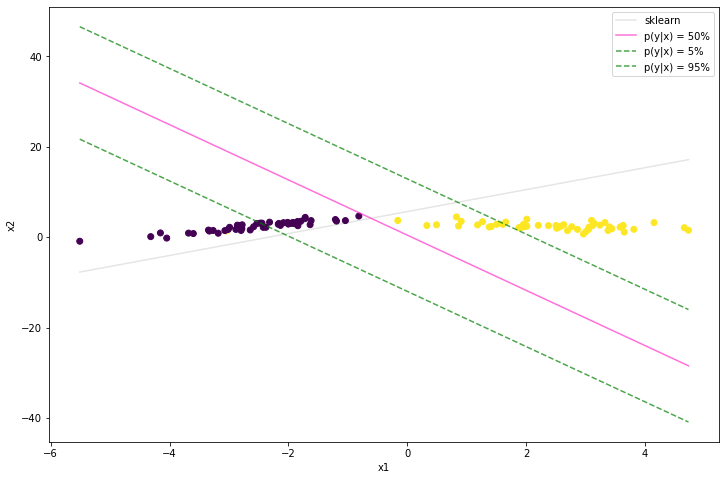

In [24]:
plt.figure(figsize=(12, 8))
plt.scatter(X[:,1], X[:,2], c=y)
plt.plot(X_range[:,1], boundry1, label='sklearn', alpha=0.1, color='black')
plt.plot(X_range[:,1], boundry2, label='p(y|x) = 50%', alpha=0.7, color='#ff33cc')
plt.plot(X_range[:,1], boundry2_05, label='p(y|x) = 5%', alpha=0.7, linestyle='--', color='green')
plt.plot(X_range[:,1], boundry2_95, label='p(y|x) = 95%', alpha=0.7, linestyle='--', color='green')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend();

In [25]:
# comparing the accuracy of our model when looking at the hyperplane
# or by computing the probability ... same!
hyperplane_acc = (X @ b_hat.T > 0).flatten(); hyperplane_acc[:10]

array([ True, False, False, False,  True,  True, False, False, False,
        True])

In [26]:
prob_acc = sigmoid(fn(b_hat, X)).flatten() > 0.50; prob_acc[:10]

array([ True, False, False, False,  True,  True, False, False, False,
        True])

In [27]:
(hyperplane_acc == prob_acc).mean()

1.0